In [2]:
! pip install -U plotly scikit-learn umap-learn

## Reduced to Two Dimensions:

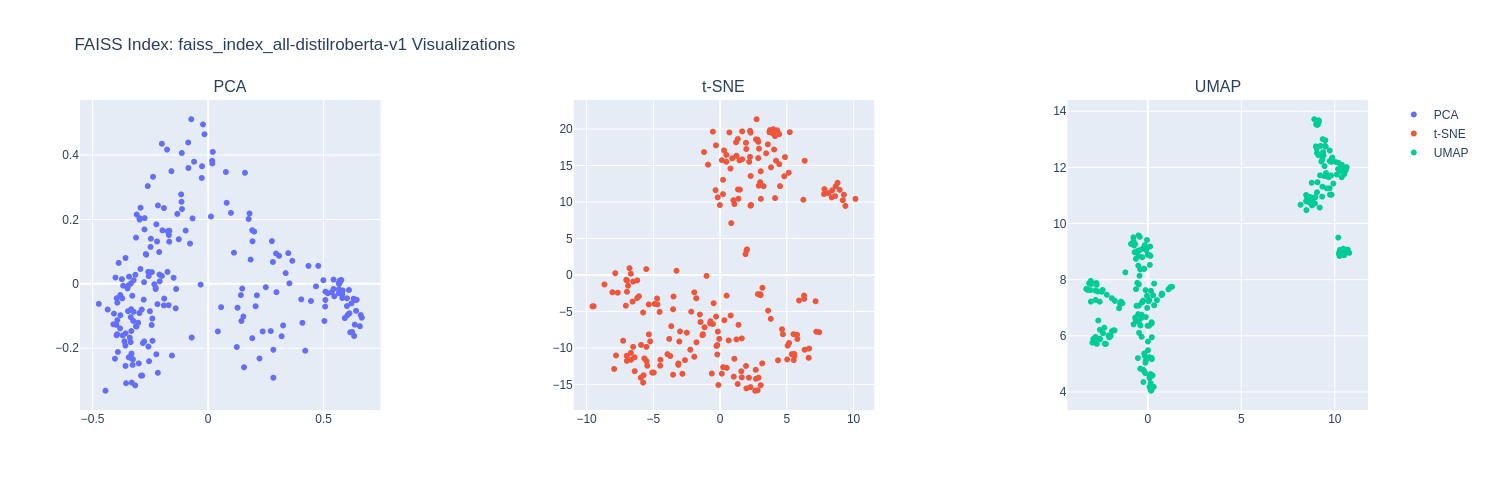

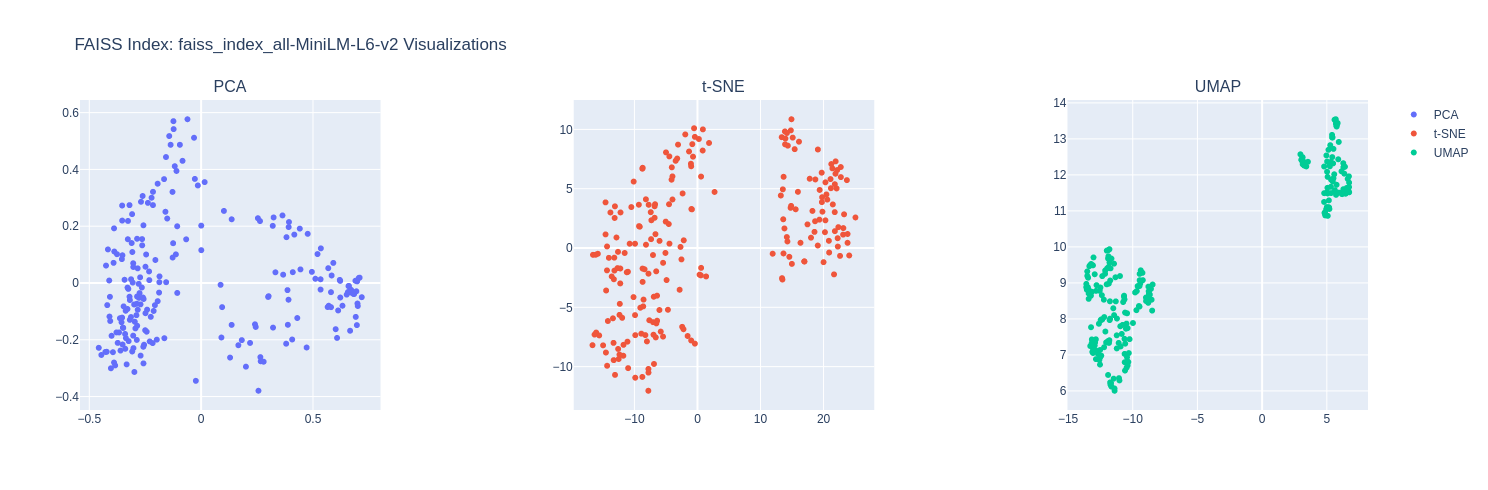

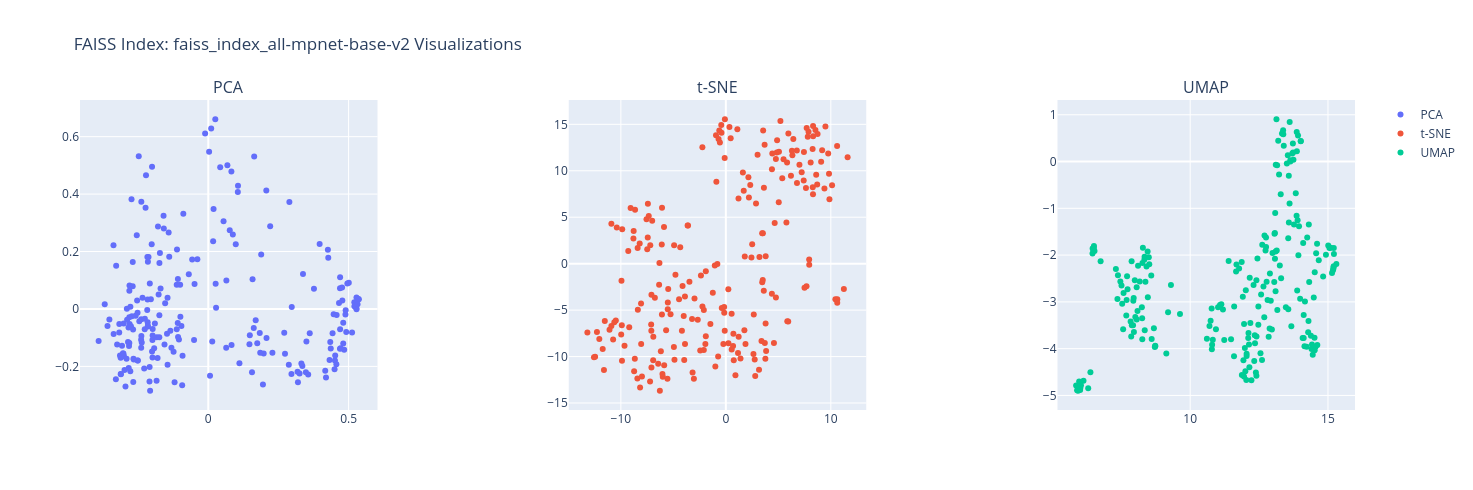

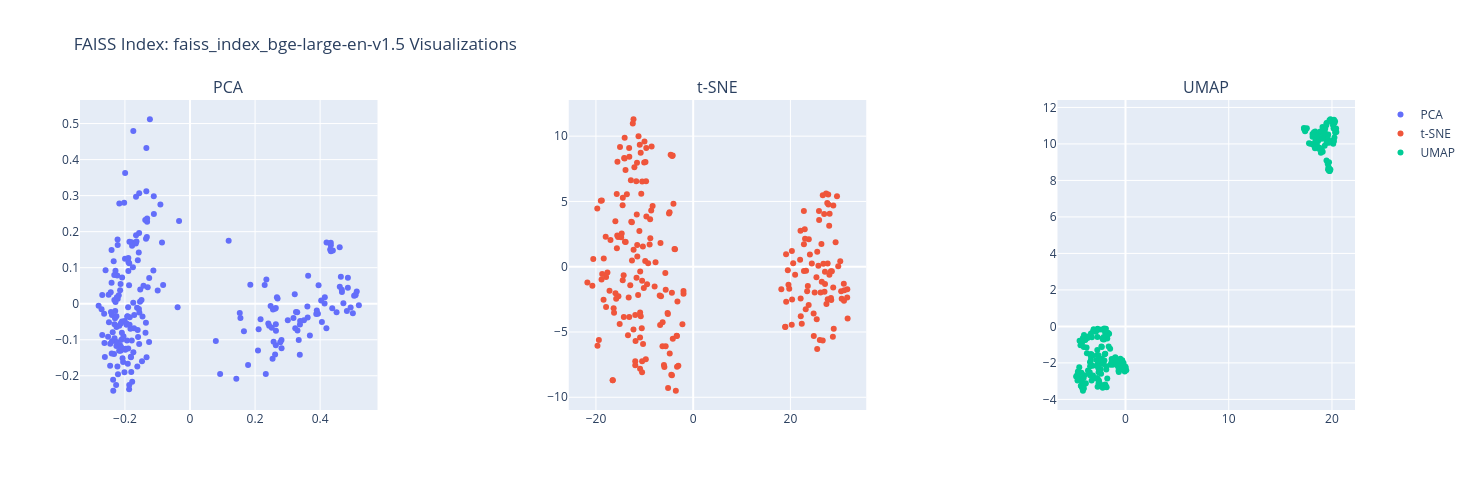

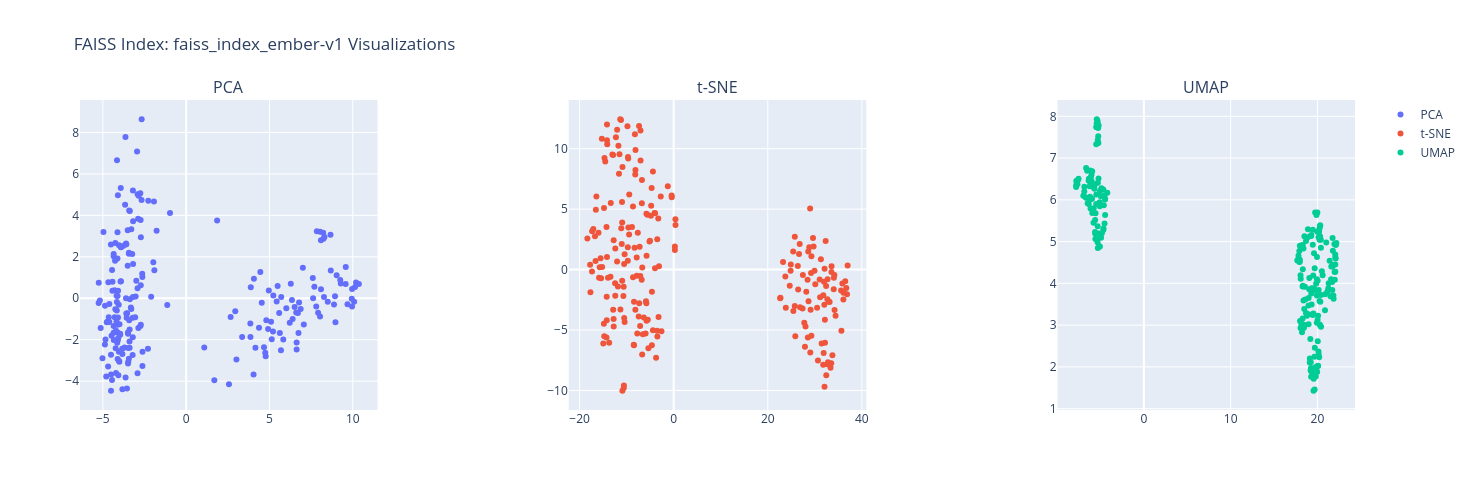

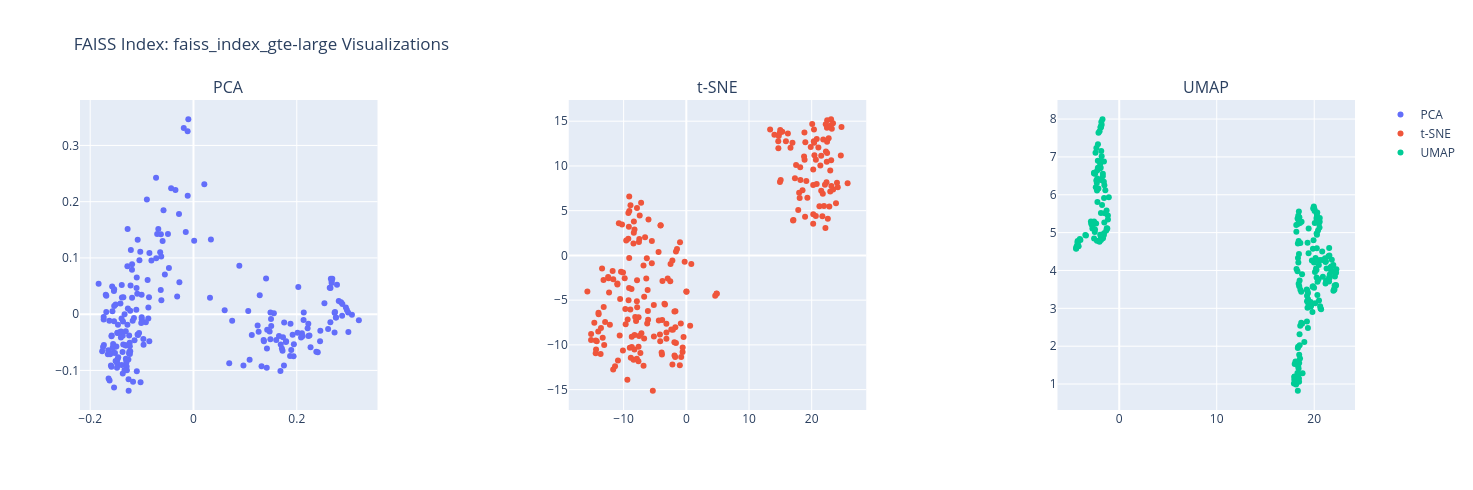

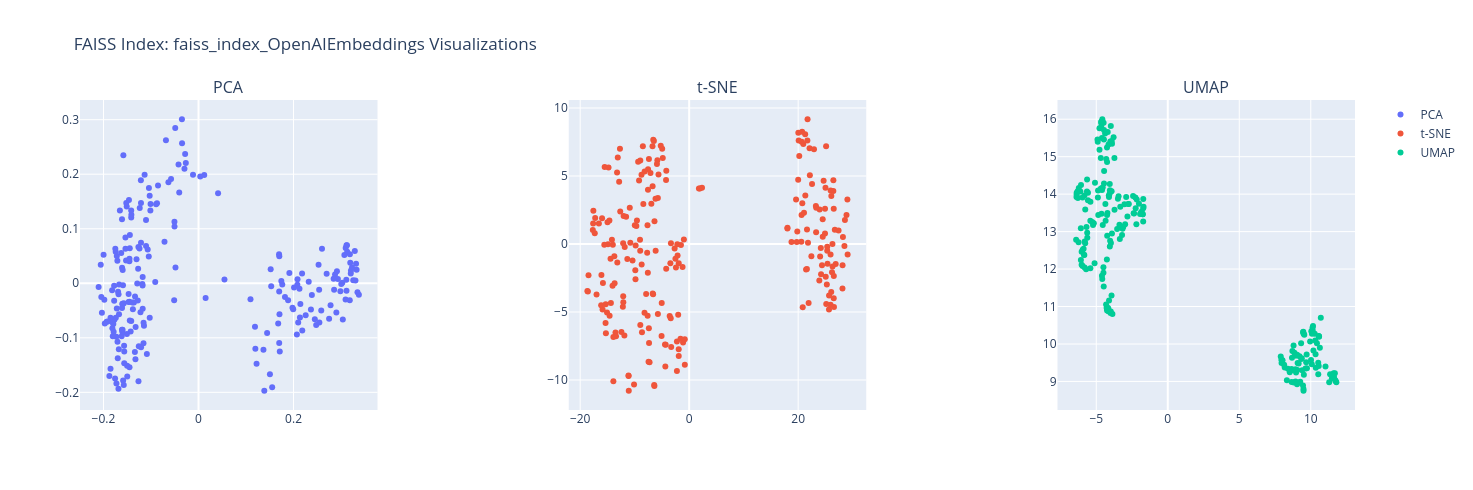

In [3]:
import faiss
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of FAISS index directories
index_directories = [
    'faiss_index_all-distilroberta-v1',
    'faiss_index_all-MiniLM-L6-v2',
    'faiss_index_all-mpnet-base-v2',
    'faiss_index_bge-large-en-v1.5',
    'faiss_index_ember-v1',
    'faiss_index_gte-large',
    # 'faiss_index_multilingual-e5-base',
    'faiss_index_OpenAIEmbeddings'
]

# Function to load and process FAISS index
def process_faiss_index(directory, reduction_method):
    # Load the FAISS index
    index_path = f'{directory}/index.faiss'
    index = faiss.read_index(index_path)

    # Extract the vectors from the FAISS index
    num_vectors = index.ntotal
    dimension = index.d
    vectors = np.zeros((num_vectors, dimension), dtype='float32')
    for i in range(num_vectors):
        vectors[i, :] = index.reconstruct(i)

    # Convert vectors to a DataFrame
    df = pd.DataFrame(vectors)

    # Apply dimensionality reduction
    if reduction_method == 'PCA':
        reducer = PCA(n_components=2)
    elif reduction_method == 't-SNE':
        reducer = TSNE(n_components=2, random_state=42)
    elif reduction_method == 'UMAP':
        reducer = UMAP(n_components=2, random_state=42)

    reduced_data = reducer.fit_transform(df.values)
    return reduced_data

# Create separate plots for each index
for directory in index_directories:
    fig = make_subplots(rows=1, cols=3,
                        subplot_titles=('PCA', 't-SNE', 'UMAP'),
                        horizontal_spacing=0.15)

    for j, method in enumerate(['PCA', 't-SNE', 'UMAP']):
        reduced_data = process_faiss_index(directory, method)
        trace = go.Scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], mode='markers', name=f'{method}')
        fig.add_trace(trace, row=1, col=j+1)

    # Update layout
    fig.update_layout(height=490, width=490*3, title_text=f'FAISS Index: {directory} Visualizations')
    fig.show()


## Reduced to Three Dimensions:

In [4]:
import faiss
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of FAISS index directories
index_directories = [
    'faiss_index_all-distilroberta-v1',
    'faiss_index_all-MiniLM-L6-v2',
    'faiss_index_all-mpnet-base-v2',
    'faiss_index_bge-large-en-v1.5',
    'faiss_index_ember-v1',
    'faiss_index_gte-large',
    # 'faiss_index_multilingual-e5-base',
    'faiss_index_OpenAIEmbeddings'
]

# Function to load and process FAISS index
def process_faiss_index(directory, reduction_method, n_components=3):
    # Load the FAISS index
    index_path = f'{directory}/index.faiss'
    index = faiss.read_index(index_path)

    # Extract the vectors from the FAISS index
    num_vectors = index.ntotal
    dimension = index.d
    vectors = np.zeros((num_vectors, dimension), dtype='float32')
    for i in range(num_vectors):
        vectors[i, :] = index.reconstruct(i)

    # Convert vectors to a DataFrame
    df = pd.DataFrame(vectors)

    # Apply dimensionality reduction
    if reduction_method == 'PCA':
        reducer = PCA(n_components=n_components)
    elif reduction_method == 't-SNE':
        reducer = TSNE(n_components=n_components, random_state=42)
    elif reduction_method == 'UMAP':
        reducer = UMAP(n_components=n_components, random_state=42)

    reduced_data = reducer.fit_transform(df.values)
    return reduced_data

figs = []
# Create separate 3D plots for each index with PCA, t-SNE, and UMAP visualizations
for directory in index_directories:
    fig = make_subplots(rows=1, cols=3,
                        subplot_titles=('PCA', 't-SNE', 'UMAP'),
                        specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}]],
                        horizontal_spacing=0.15)

    for j, method in enumerate(['PCA', 't-SNE', 'UMAP']):
        reduced_data = process_faiss_index(directory, method, n_components=3)
        trace = go.Scatter3d(x=reduced_data[:, 0], y=reduced_data[:, 1], z=reduced_data[:, 2], 
                             mode='markers', marker={"size":2}, name=f'{method}')
        fig.add_trace(trace, row=1, col=j+1)

    # Update layout
    fig.update_layout(height=490, width=490*3, title_text=f'FAISS Index: {directory} Visualizations (3D)')
    figs.append(fig)


In [ ]:
from ipylab import JupyterFrontEnd
app = JupyterFrontEnd()
for i in range(len(figs)):
    app.commands.execute('notebook:insert-cell-below')
    app.commands.execute('notebook:replace-selection', { 'text': f"figs[{i}]"})

In [25]:
figs[0]

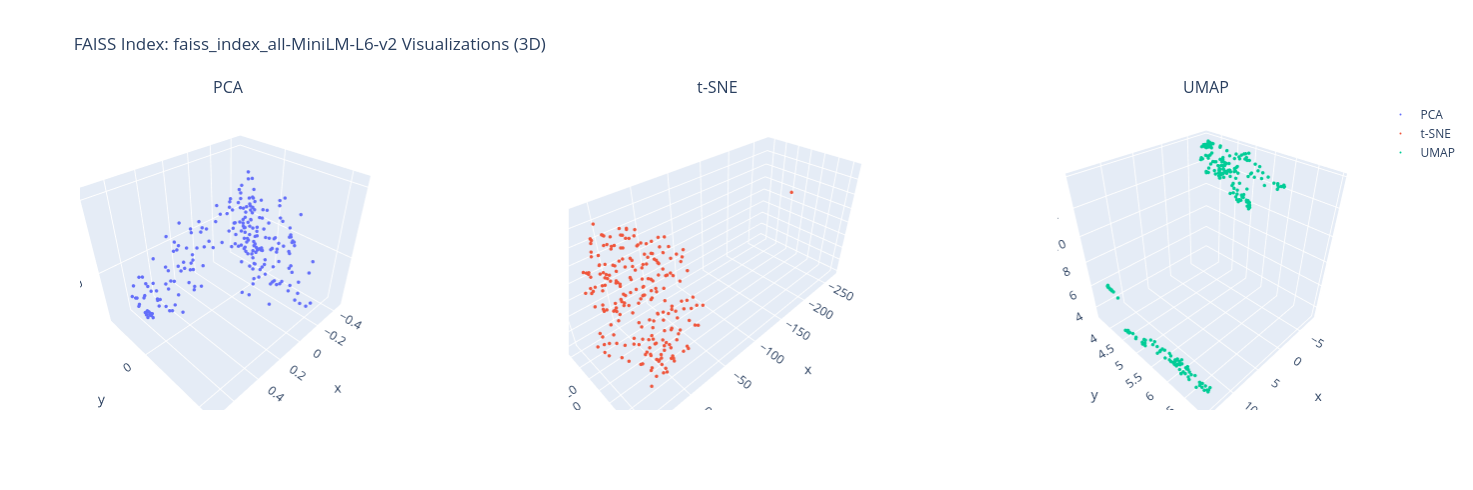

In [18]:
figs[1]

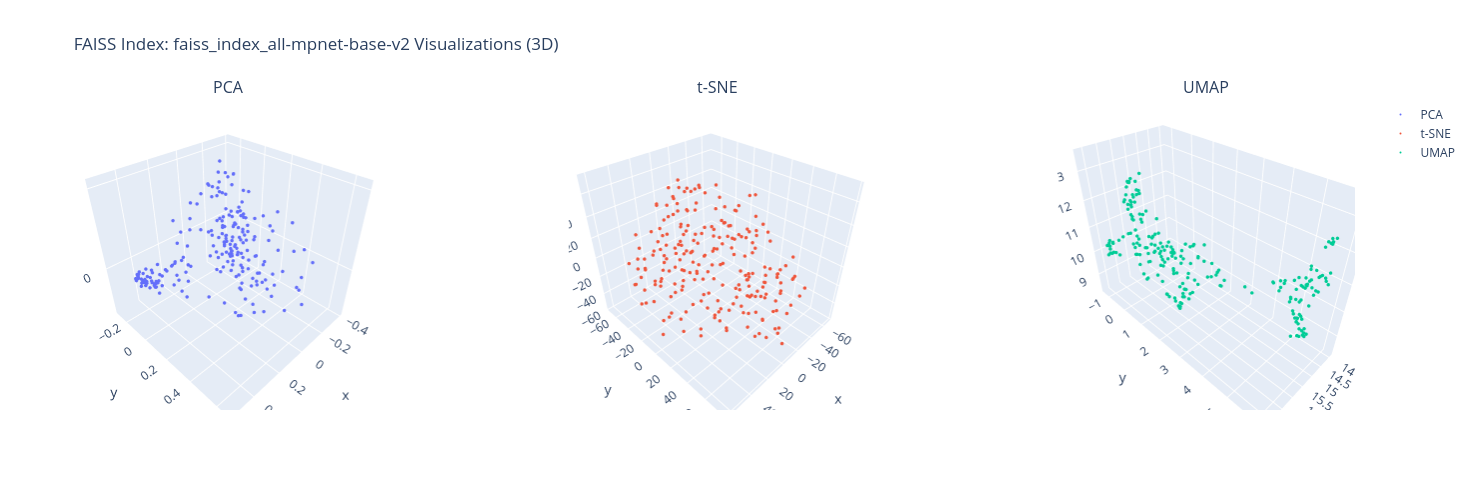

In [19]:
figs[2]

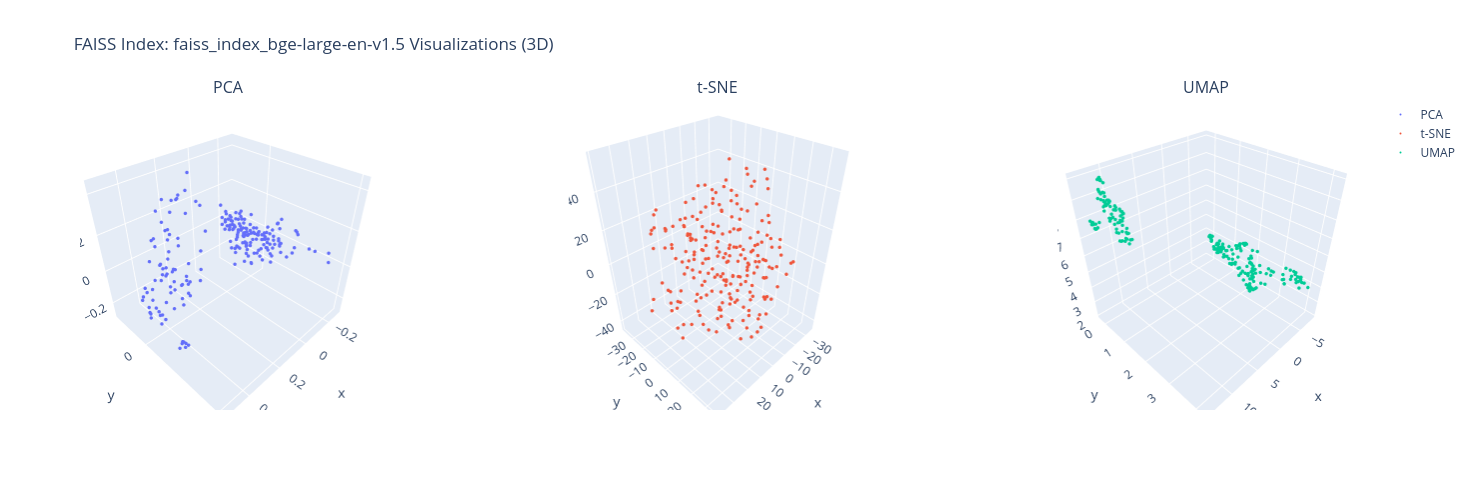

In [20]:
figs[3]

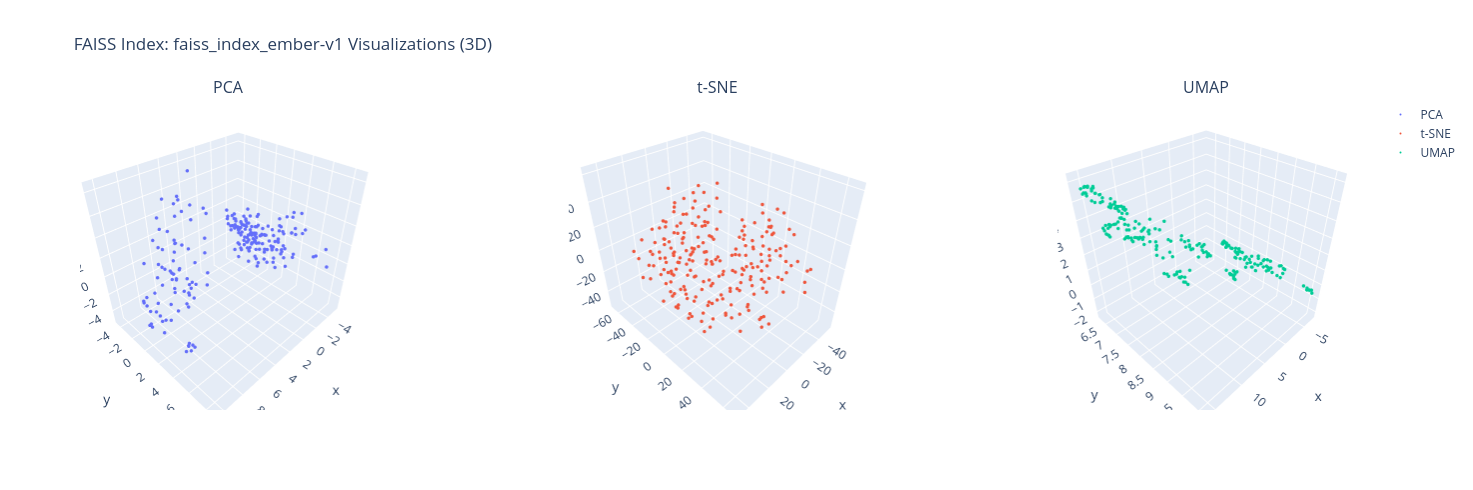

In [21]:
figs[4]

In [22]:
figs[5]

In [23]:
figs[6]